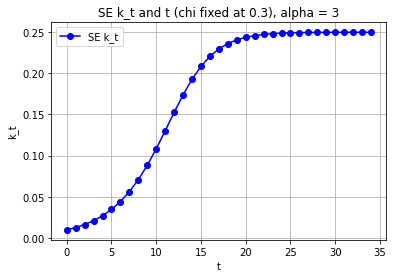

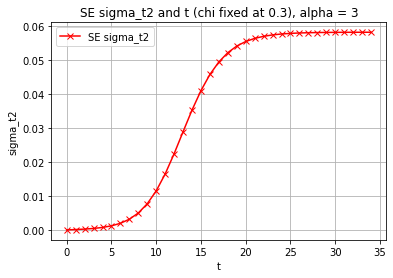

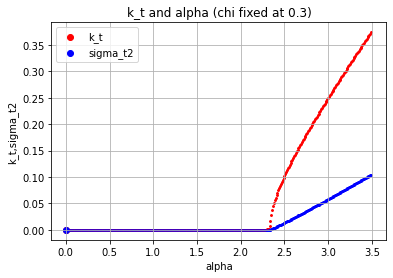

In [4]:
#State Evoluation (second version fix the chi, alpha = 3)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def y_s(p,t):#using iteration to solve y^*
    eps = 1e-5 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            return y_new #return the solution
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def k_sigma(alpha):
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    chi = 0.3
    eps = 1e-5
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_ = 0
    k_collec = []
    sigma_collec = []
    k_collec.append(0.01)
    sigma_collec.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f = 0
        sum_f2 = 0
        iter_+=1
        for z in range(-50,51,1):
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)
        k_new = alpha*chi*sum_f
        sigma_new = alpha*chi**2*sum_f2
        parameter_new = np.array([k_new,sigma_new])
        k_collec.append(k_new)
        sigma_collec.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return iter_,k_collec,sigma_collec


idx = []
for index in range(k_sigma(3)[0]+1):
    idx.append(index)
plt.plot(idx,k_sigma(3)[1],c="b",label="SE k_t",marker="o")
#plt.plot(idx,k_sigma(3)[2],c="r",label="SE sigma_t2",marker="x")
plt.title("SE k_t and t (chi fixed at 0.3), alpha = 3")
plt.ylabel("k_t")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.show()

#plt.plot(idx,k_sigma(3)[1],c="b",label="SE k_t",marker="o")
plt.plot(idx,k_sigma(3)[2],c="r",label="SE sigma_t2",marker="x")
plt.title("SE sigma_t2 and t (chi fixed at 0.3), alpha = 3")
plt.ylabel("sigma_t2")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.show()

for alpha in np.arange(0.0,3.5,0.01):
    plt.scatter(alpha,k_sigma(alpha)[1][-1],c="r",s=3.5)
    plt.scatter(alpha,k_sigma(alpha)[2][-1],c="b",s=3.5)
plt.scatter(0,0,c="r",label="k_t")
plt.scatter(0,0,c="b",label="sigma_t2")
plt.title("k_t and alpha (chi fixed at 0.3)")
plt.ylabel("k_t,sigma_t2")
plt.xlabel("alpha")
plt.grid()
plt.legend()
plt.show()

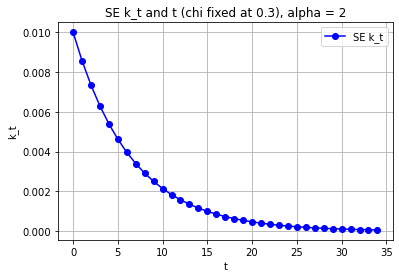

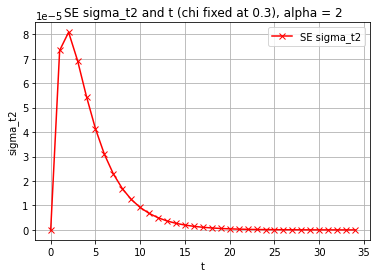

In [2]:
#State Evoluation (second version fix the chi, alpha = 2)
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def y_s(p,t):#using iteration to solve y^*
    eps = 1e-5 #epsilon
    y_st = 1 #initial y^*
    flag =True
    while flag:
        y_new = np.tanh(p+np.sqrt(t)*y_st)*np.sqrt(t)
        if LA.norm(y_new - y_st) < eps: #update until threshold met
            return y_new #return the solution
        y_st = y_new

def F(p,t): #F function
    return y_s(p,t)/(np.sqrt(t))

def T(p,t): #T function
    return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

def k_sigma(alpha):
    k_t = 0.01
    sigma_s2 = 1
    sigma_t2 = 0
    chi = 0.3
    eps = 1e-5
    parameter_old = np.array([k_t,sigma_t2])
    parameter_new = np.array([1,1])
    iter_ = 0
    k_collec = []
    sigma_collec = []
    k_collec.append(0.01)
    sigma_collec.append(sigma_t2)
    while LA.norm(parameter_new - parameter_old)>eps:
        parameter_old = np.array([k_t,sigma_t2])
        sum_f = 0
        sum_f2 = 0
        iter_+=1
        for z in range(-50,51,1):
            sum_f += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)/np.sqrt(2*np.pi)
            sum_f2 += np.exp(-1/2*z**2)*F(k_t*sigma_s2+np.sqrt(k_t**2*sigma_s2+sigma_t2)*z,chi)**2/np.sqrt(2*np.pi)
        k_new = alpha*chi*sum_f
        sigma_new = alpha*chi**2*sum_f2
        parameter_new = np.array([k_new,sigma_new])
        k_collec.append(k_new)
        sigma_collec.append(sigma_new)
        k_t = k_new
        sigma_t2 = sigma_new
    return iter_,k_collec,sigma_collec

idx = []
for index in range(k_sigma(2)[0]+1):
    idx.append(index)
plt.plot(idx,k_sigma(2)[1],c="b",label="SE k_t",marker="o")
#plt.plot(idx,k_sigma(3)[2],c="r",label="SE sigma_t2",marker="x")
plt.title("SE k_t and t (chi fixed at 0.3), alpha = 2")
plt.ylabel("k_t")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.show()

#plt.plot(idx,k_sigma(3)[1],c="b",label="SE k_t",marker="o")
plt.plot(idx,k_sigma(2)[2],c="r",label="SE sigma_t2",marker="x")
plt.title("SE sigma_t2 and t (chi fixed at 0.3), alpha = 2")
plt.ylabel("sigma_t2")
plt.xlabel("t")
plt.grid()
plt.legend()
plt.show()